# scipy-stats
***

# 1) scipy-stats Overview
***

## 1.1) SciPy Introduction
Python was first released in 1991 [1], during the 1990's there was an array type for numerical computing added to Python, this was called Numeric. In 2006 Numeric was replaced with NumPy. NumPy stands for Numerical Python and is used for working with numerical arrays. NumPy also has functions for working in domain of linear algebra, fourier transform, and matrices [2]. As of 2000, there was a growing number of extension modules and increasing interest in creating a complete environment for scientific and technical computing. In 2001, Travis Oliphant, Eric Jones, and Pearu Peterson merged code they had written and called the resulting package SciPy [3]. 

SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy, an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems, such as MATLAB, IDL, Octave, R-Lab, and SciLab [3].

SciPy is easy to use, runs on all popular operating systems, is quick to install, and free of charge [4]. Some of the world's leading scientists and engineers use SciPy for completing statistical analysis. One example of this is in the medical device industry where many functions from research and development to process development to operations meet to discuss new product development. Without SciPy multiple meetings and discussions would take place but this is now being replaced by a much more efficient interative Python session using SciPy. 

## 1.2) scipy-stats
Within SciPy there are many packages as shown in Figure 1. SciPy includes functionality to complete many types of data analysis but for this notebook only scipy.stats is of interest.

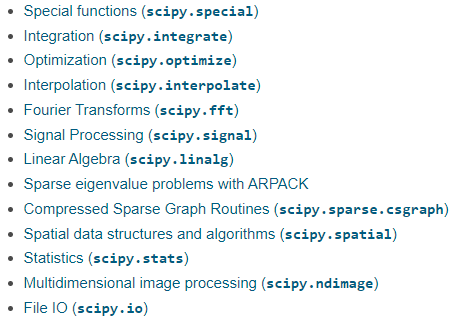
<center><b> Figure 1: SciPy functionality [5]</b></center>
<br>

The scipy.stats module houses statistics functions and contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more [6]. In this notebook scipy.stats will be used to demonstrate some common statistical hypothesis testing, the 2 sample t test and ANOVA testing.

# 2) Hypothesis testing
***
A hypothesis in statistics in a premise or claim that we want to test or investigate. In statistics we can't go into a labratory but what we can do is collect data. We can use this data then to investigate the population. What we're doing here is sampling, taking a sample and inferring to a population. 

We can test the hypothesis on the data available. In statistics we put together tests to invetigate the hypothesis. In work we could claim that 2 machines are the same, that's the hypothesis, to test this hypothesis we need to do some statistical analysis.

### 2.1) Null Hypothesis  $H_{0}$
Null in this context is the thing that's already established. It's the currently accepted parameter. The Null hypothesis for the machine from above is that both machines are the same. We assume the Null hypothesis to be true unless the evidence suggests that we need to reject the Null hypothesis.

### 2.2) Alternative Hypothesis $H_{a}$
Also called the research hypothesis. Involves the claim to be tested. 

### 2.3) Example of the Null Hypothesis  $H_{0}$ and the Alternative Hypothesis $H_{a}$
It is believed that an injection moulding machine manufactures parts with a weight of 5g. The maintenance technician believes that after maintenance the parts no longer weigh 5g, here are  $H_{0}$ and $H_{a}$.

$H_{0}$: μ = 5g
$H_{a}$: μ ≠ 5g

The Null hypothesis and the Alternative hypothesis are mathematically opposites meaning;

* if $H_{0}$ = x then $H_{a}$ ≠ x
* if $H_{0}$ > x then $H_{a}$ < x

Now that there is a Null and Alternative Hypothesis, the next steps would be to complete the hypothesis testing.

**Possible outcomes of this test**

* 1 Reject the Null hypothesis - the machine no longer manufactures parts that are 5g
* 2 Fail to Reject the Null Hypothesis - no evidence to suggest anything other than the machine makes parts that are 5g

**How is the testing done?**
Use the test statistic, this is calculated from sample data and used to decide. For example we sample 50 moulded parts, we get the average mass of the 50 parts, then calculate the test statistic to see if the data is statistically significant.

**Statistically significance**
Where do we draw the line to help us decide if we accept or reject the Null hypothesis. During the test the following observations are made:

* sample 1 = 5.15g - easy to agree that this is close to 5g
* sample 2 = 5.72g - more subjective, is it close or not
* sample 3 = 7.23g - easy to say that this isn't close to 5g

Based on the above samples its easy to reject the Null hypothesis particularly based on the 7.23g average value which is significant as its the average of 50 moulded parts. Rather than people giving opinions on if the machine is moulding parts with a weight of 5g there needs to be a more concrete method of deciding. That is what hypothesis testing in statistics does. 

A hypothesis test collects that data, puts it in an equation, you get a number back, this number is the test statistic and decides whether to reject or fail to reject the Null hypothesis.

**Level of confidence**
How confident are we in our decision to reject or fail to reject the Null hypothesis. Usually 95% the higher the level of confidence the more likely the outcome will be correct.

**Level of significance**
1 - level of confidence, if the level of confidence is 95% or 0.95 then the level of significance is 1 - 0.95 = 0.05.

Both the level of confidence and the level of significance tell the same thing, how sure you are that you're making the correct decision, when deciding to reject the null hypothesis or fail to reject the Null hypothesis.

Summarising, in statistics we want to test a hypothesis, some claim that we want to investigate. There are two types of hypothesis, the Null and the Alternative. The Null is the currently accepted or believed to be true and the alternative is the hypothesis that challenges the accepted. The Null is based on previous studys, surveys or data collected in the past. Along comes someone with new information and proposes an alternative hypothesis that they believe is true. This is what we need to test. $H_{0}$ is what we believe to be true, $H_{a}$ is what we're proposing to be true and this is what we're testing. We either reject the Null or fail to reject the Null hypothesis.

What's interesting is that in statistics you don't have to prove the Null hypothesis is true, you assume it is and you either reject it or fail to reject it. 

## 2.1) Two sample t-test
***
A common hypothesis test is the Two Sample T Test. It is used to compare the means of two groups and to determine if the means between the groups are statistically different or down to random chance. It helps to answer questions like whether the average success rate is higher after implementing a new sales tool than before or whether the test results of patients who received a drug are better than test results of those who received a placebo [7]. 

Consider the following examples where a manufaturing engineer wants to know if two machines making the same part have the same mean length. To test this hypothesis the engineer collects 50 samples from each machine.

**Note:** There are two examples demonstrated below, 
* in example 1 the means are manipulated so as to fail to reject the null hypothesis.
* in example 2 the means are manipulated so as to reject the null hypothesis.

### 2.1.1) Example 1 - Create the data

In [137]:
# step 1 is to create the data
import numpy as np

machine1 = np.array([14, 15, 15, 16, 13, 8, 14, 17, 16, 14, 19, 20, 21, 15, 15, 16, 16, 13, 14, 12])
machine2 = np.array([15, 17, 14, 17, 14, 8, 12, 19, 19, 14, 17, 22, 24, 16, 13, 16, 13, 18, 15, 13])

In [138]:
#find variance for each group
print(np.round((np.var(machine1), np.var(machine2)),3))
ratio = np.var(machine2)/np.var(machine1)
print(ratio)

[ 7.728 12.26 ]
1.586541572306697


The ratio of the larger sample variance to the smaller sample variance is 1.586, which is less than 4. This means we can assume that the population variances are equal.

Thus, we can proceed to perform the two sample t-test with equal variances:

### 2.1.2) Example 1 - Conduct the two sample t-test

In [139]:
#step 2
import scipy.stats as stats

#perform two sample t-test with equal variances
print(stats.ttest_ind(a=machine1, b=machine2, equal_var=True))

Ttest_indResult(statistic=-0.6337397070250238, pvalue=0.5300471010405257)


### 2.1.3) Example 1 - Results interpretation
The two hypotheses for this particular two sample t-test are as follows:

$H_{0}$: µ1 = µ2 (the two population means are equal)

$H_{a}$: µ1 ≠µ2 (the two population means are not equal)

Because the p-value of our test (0.53005) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean lengths of the tubes between the two machines is different.

### 2.2.1) Example 2 - Create the data

In [140]:
machine3 = np.array([24, 25, 25, 26, 23, 28, 24, 27, 26, 24, 29, 20, 21, 25, 25, 26, 26, 23, 24, 22])
machine4 = np.array([15, 17, 14, 17, 14, 8, 12, 19, 19, 14, 17, 22, 24, 16, 13, 16, 13, 18, 15, 13])

In [141]:
#find variance for each group
print(np.round((np.var(machine3), np.var(machine4)),2))
ratio = np.round(np.var(machine4)/np.var(machine3),2)
print(ratio)

[ 4.63 12.26]
2.65


The ratio of the larger sample variance to the smaller sample variance is 2.65, which is less than 4. This means we can assume that the population variances are equal.

Thus, we can proceed to perform the two sample t-test with equal variances:

### 2.2.2) Example 2 - Conduct the two sample t-test

In [142]:
import scipy.stats as stats

#perform two sample t-test with equal variances
print(stats.ttest_ind(a=machine3, b=machine4, equal_var=True))

Ttest_indResult(statistic=9.387228516201997, pvalue=1.9207324927321405e-11)


### 2.2.3) Example 2 - Results interpretation
The two hypotheses for this particular two sample t-test are as follows:

$H_{0}$: µ1 = µ2 (the two population means are equal)

$H_{a}$: µ1 ≠µ2 (the two population means are not equal)

Because the p-value of our test (1.92e-11) is less than alpha = 0.05, we reject the null hypothesis of the test. We have sufficient evidence to say that the mean lengths of the tubes between the two machines is different.

### 2.3.1) Example 1 - Create the data
Consider this third example which includes a bit more detail.

A taxi company in Galway use petrol and diesel cars. The owner is looking to reduce costs. He wants to know if the maintenance costs are higher for petrol or diesel cars. To determine this a 2 sample t-test is complete.

**Collect the data**
Repair costs are collected for 36 petrol cars and 23 diesel cars. The data collected is €/100km. To complete this example the following is complete:

* Null and alternative hypothesis are stated for the test.
* Boxplots of the data provided to visualise the data.
* Normal probability plot provided to check that the data is normally distributted.
* 2 variances test to determine if the variances are different between the repair costs for the petrol and diesel cars.
* Perform a 2 sample t test
* Based on the test recommend if the taxi company should use petrol or diesel cars based on maintenance costs.

#### 2.3.1.1) Null and alternative hypothesis are stated for the test.
$H_{0}$: The average maintenence costs for petrol cars is equal to the average maintenance costs for diesel cars

$H_{a}$: The average maintenence costs for petrol cars is not equal to the average maintenance costs for diesel cars

#### 2.3.1.2) Boxplots of the data provided to visualise the data.

In [168]:
import pandas as pd
fuel_df = pd.read_csv('Fuel.csv')
petrol = fuel_df['Petrol']
diesel = fuel_df['Diesel']

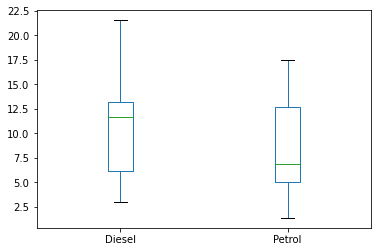

In [169]:
boxplot = fuel_df.boxplot(column=['Diesel', 'Petrol'], grid=False,)

Looking at the boxplot above it appears that the maintenance costs for petrol and diesel cars is similar

#### 2.3.1.2) Normal probability plots provided to check that the data is normally distributed.

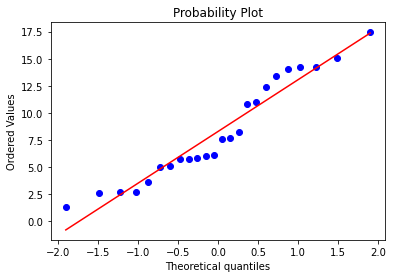


P value for Petrol from Shapiro-Wilk test: 0.10234157741069794



In [170]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(fuel_df['Petrol'], sparams=(), dist='norm', fit=True, plot=ax, rvalue=False)
plt.show()
print('')
print(f'P value for Petrol from Shapiro-Wilk test: {stats.shapiro(petrol).pvalue}')
print('')

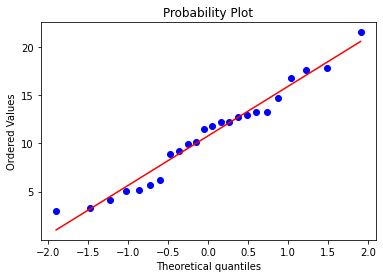


P value for Diesel from Shapiro-Wilk test: 0.5100336074829102



In [171]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
stats.probplot(fuel_df['Diesel'], sparams=(), dist='norm', fit=True, plot=ax2, rvalue=False)
plt.show()
print('')
print(f'P value for Diesel from Shapiro-Wilk test: {stats.shapiro(diesel).pvalue}')
print('')

In the normality plots above it can be seen that both the petrol and diesel data follow an approximate straight line. This suggests that the data are from a normally distributed population. Further testing by means of the Shapiro Wilks test was also complete for both the petrol and diesel data. The results of both are greater than 0.05, this also suggests that the data are from a normally distributed population. Based on the above the conclusion is that the data is normally distributed.

#### 2.3.1.3) 2 variances test

In [172]:
stats.levene(petrol, diesel, center='median')

LeveneResult(statistic=0.0022419389285132213, pvalue=0.9624399585179602)

For the 2 variances test the levene test is used. The p-value if 0.962 is greater than the significance level which was 0.05. The result here is that we fail to reject the null hypothesis that the variability in maintenance costs for petrol cars is equal to the variability in the in maintenance costs for diesel cars. There isn't enough evidence to conclude that the variability in repair costs for the trucks is different.

#### 2.3.1.4) 2 sample t test

In [173]:
print(stats.ttest_ind(a=petrol, b=diesel, equal_var=True))

Ttest_indResult(statistic=-1.797310977811207, pvalue=0.07885269344222931)


Based on the evidence provided in the 2 sample t test the conclusion is to fail to reject the null hypothesis. There's no enough evidence to suggest that there is a difference in maintenance costs between the petrol and diesel cars. The p-value of 0.0789 is greater than the significance level of 0.05. The message back to the taxi company owner is that based on maintenance costs there is no statistical difference between the petrol and diesel cars.

## 2.2) ANOVA
***
ANOVA or ANalysis Of VAriance is similar to the 2 sample t test but is typically used when the hypothesis involves more than two populations. For example if the hypothesis involves comparisons between machine a and machine b then a 2 sample t test would be typically be chosen, if the hypothesis involves comparisons between machine a, machine b and machine c, then ANOVA would typically be used for analysis. Just like with the 2 sample t test, the first step is to come up with a Null and Alternative Hypothesis. Consider the following example.

A company uses 4 moulding machines to manufacture the same moulded component. The manufacturing engineer is comparing the tensile strength of the moulded component from all 5 machines. The manufacturing engineer randomly selects seven samples from each machine and measures their tensile strength. In order to determine if there are differences between machines and the manufacturing engineer decides to complete and ANOVA test.

To do this test a one-way ANOVA is used as only one factor or independent variable is considered. First step is to state the Null and Alternative hypothoses.

$H_{0}$: The mean tensile strength of the 4 machines are equal

$H_{a}$: At least one of mean tensile strengths of the 4 machines is different from the others.

ANOVA compares different sources of variation to determine whether groups are significantly different. This can be between-group and within-group variation. 

**F-statistic:** The F-statistic is a ratio of between-group and within-group variation. So when F is large, between-group variation is larger than within-group variation, which indicates a real difference between group means. When F is small, the between and within-group variations are similar, indicating that there is little or no evidence of a significant difference.

**p-value:**  The p-value is the probability of obtaining an F-statistic at least as extreme as the actual calculated value, given that the null hypothesis is true. If the p-value is greater than α, we fail to reject the null hypothesis. If the p-value is less than or equal to α, we reject the null hypothesis. The p-value from the ANOVA output is used to determine whether the main effect is statistically significant.

### 2.2.1) ANOVA Assumptions
**Assumption #1:** Your dependent variable should be continuous.Continuous Data can take any value. An example of continuous data would be; Time in a race: you could even measure it to fractions of a second.

**Assumption #2:** Your independent variable should consist of two or more categorical, independent groups. Typically, a one-way ANOVA is used when you have three or more categorical, independent groups.

**Assumption #3:** You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves. 

**Assumption #4:** There should be no significant outliers.

**Assumption #5:** Your dependent variable should be approximately normally distributed for each category of the independent variable.

**Assumption #6:** There needs to be homogeneity of variances. You can test this assumption using Levene's test for homogeneity of variances.

### 2.2.1) Loading the data and assessing the assumptions

In [254]:
mould_df = pd.read_csv('MouldingMachine.csv')
tensile = mould_df['Tensile'] # dependent variable
machine = mould_df['Machine'] # independent variable

#### 2.2.1.1) Checking assumption 1
**Assumption #1:**  Your dependent variable should be continuous.

In [255]:
tensile.describe()

count     40.000000
mean     220.085000
std        9.697758
min      203.810000
25%      211.580000
50%      221.485000
75%      228.390000
max      235.450000
Name: Tensile, dtype: float64

In [256]:
tensile.head()

0    206.32
1    207.94
2    206.19
3    204.45
4    209.65
Name: Tensile, dtype: float64

From the data above it can be seen that the dependent varaible is continuous, therefor assumption 1 is satisfied.

#### 2.2.1.2) Checking assumption 2
**Assumption #2:** Your independent variable should consist of two or more categorical, independent groups. Typically, a one-way ANOVA is used when you have three or more categorical, independent groups.

In [257]:
machine.describe()

count           40
unique           4
top       Machine1
freq            10
Name: Machine, dtype: object

In [258]:
machine.head(15)

0     Machine1
1     Machine1
2     Machine1
3     Machine1
4     Machine1
5     Machine1
6     Machine1
7     Machine1
8     Machine1
9     Machine1
10    Machine2
11    Machine2
12    Machine2
13    Machine2
14    Machine2
Name: Machine, dtype: object

From the data above it can be seen that the independent varaible is catagorical, therefor assumption 2 is satisfied.

#### 2.2.1.3) Checking assumption 3
**Assumption #3:** You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves.

There is no test for assumption 3, this is a study design issue.

#### 2.2.1.4) Checking assumption 4
**Assumption #4:** There should be no significant outliers.

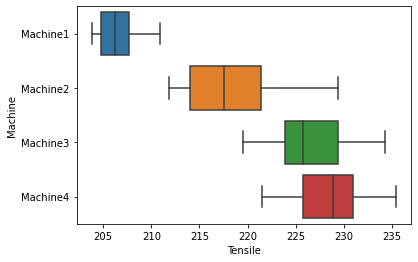

In [263]:
sns.boxplot(x=tensile, y=machine)

From the boxplot above there are no significant outliers (outliers would be evident through datapoints outside of the line at the end of the whisker. Often depicted by an asterik or a dot. Given that there is no outliers, assumption 4 is satisfied.

#### 2.2.1.5) Checking assumption 5
**Assumption #5:** Your dependent variable should be approximately normally distributed for each category of the independent variable.

In [282]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

AttributeError: module 'seaborn' has no attribute 'displot'

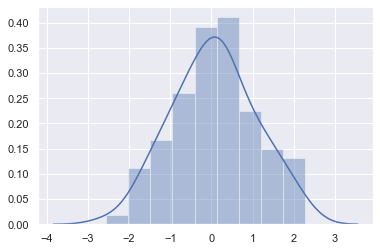

In [284]:
import seaborn as sns, numpy as np
sns.set(); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)

In [287]:
penguins = sns.load_dataset("penguins")
sns.distplot(penguins, a="flipper_length_mm")

TypeError: distplot() got multiple values for argument 'a'

#### 2.2.1.6) Checking assumption 6
**Assumption #6:** There needs to be homogeneity of variances. You can test this assumption using Levene's test for homogeneity of variances.

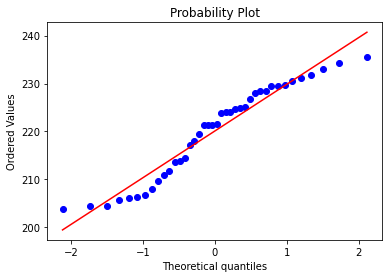


P value for Tensile from Shapiro-Wilk test: 0.018478183075785637



In [189]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(mould_df['Tensile'], sparams=(), dist='norm', fit=True, plot=ax, rvalue=False)
plt.show()
print('')
print(f'P value for Tensile from Shapiro-Wilk test: {stats.shapiro(tensile).pvalue}')
print('')

### 2.2.1) Completing an ANOVA on dataset from web

### 2.2.2 Completing an ANOVA on dataset from work

# 3) Summary
***

# 4) Conclusion
***

# 5) References
***
[1] https://pythoninstitute.org/what-is-python/#:~:text=Python%20is%20a%20widely%2Dused,released%20on%20February%2020%2C%201991.

[2] https://www.w3schools.com/python/numpy/numpy_intro.asp

[3] https://docs.scipy.org/doc/scipy/reference/tutorial/general.html

[4] https://github.com/scipy/scipy

[5] https://scipy.github.io/devdocs/tutorial/index.html

[6] https://docs.scipy.org/doc/scipy/reference/reference/stats.html#module-scipy.stats

[7] https://www.isixsigma.com/tools-templates/hypothesis-testing/making-sense-two-sample-t-test/

# End
***